<a href="https://colab.research.google.com/github/mpky/YOLO-v2/blob/master/YOLO_v2_201904.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/Colab_Projects/YOLO_v2

/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/YOLO_v2


In [3]:
!ls

darkflow  YOLO_v2_201904.ipynb


In [4]:
# !git clone https://github.com/thtrieu/darkflow

Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 18.74 MiB | 13.92 MiB/s, done.
Resolving deltas: 100% (1783/1783), done.


In [4]:
%cd darkflow
!python3 setup.py build_ext --inplace

/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/YOLO_v2/darkflow
running build_ext
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/nms.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo2_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils


In [7]:
# !wget https://pjreddie.com/media/files/yolov2.weights

--2019-04-28 03:25:22--  https://pjreddie.com/media/files/yolov2.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203934260 (194M) [application/octet-stream]
Saving to: ‘yolov2.weights’

yolov2.weights      100%[===================>] 194.49M  21.1MB/s    in 10s     

2019-04-28 03:25:33 (19.0 MB/s) - ‘yolov2.weights’ saved [203934260/203934260]



In [5]:
!python flow --model cfg/yolo.cfg \
--load bin/yolov2.weights \
--demo bike_riding.mp4 \
--gpu 0.8 \
--saveVideo


/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/YOLO_v2/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))
Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.4049663543701172s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (

In [6]:
!python flow --help


Example usage: flow --imgdir sample_img/ --model cfg/yolo.cfg --load bin/yolo.weights

Arguments:
  --help, --h, -h  show this super helpful message and exit
  --imgdir         path to testing directory with images
  --binary         path to .weights directory
  --config         path to .cfg directory
  --dataset        path to dataset directory
  --labels         path to labels file
  --backup         path to backup folder
  --summary        path to TensorBoard summaries directory
  --annotation     path to annotation directory
  --threshold      detection threshold
  --model          configuration of choice
  --trainer        training algorithm
  --momentum       applicable for rmsprop and momentum optimizers
  --verbalise      say out loud while building graph
  --train          train the whole net
  --load           how to initialize the net? Either from .weights or a checkpoint, or even from scratch
  --savepb         save net and weight to a .pb file
  --gpu            how much 

In [0]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3,
    'gpu':0.8
}

tfnet = TFNet(options)

Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.0762338638305664s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.


/content/gdrive/My Drive/Colab Notebooks/Colab_Projects/YOLO_v2/darkflow/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Y

In [9]:
img = cv2.imread('test_image_bikes.jpg')

result = tfnet.return_predict(img)

result

[{'bottomright': {'x': 2991, 'y': 2724},
  'confidence': 0.8533923,
  'label': 'person',
  'topleft': {'x': 2574, 'y': 1442}},
 {'bottomright': {'x': 2057, 'y': 2551},
  'confidence': 0.482632,
  'label': 'person',
  'topleft': {'x': 1548, 'y': 1934}},
 {'bottomright': {'x': 5525, 'y': 2556},
  'confidence': 0.55338436,
  'label': 'person',
  'topleft': {'x': 4953, 'y': 2202}},
 {'bottomright': {'x': 2033, 'y': 2740},
  'confidence': 0.75269556,
  'label': 'bicycle',
  'topleft': {'x': 876, 'y': 1925}},
 {'bottomright': {'x': 4010, 'y': 2737},
  'confidence': 0.8586557,
  'label': 'bicycle',
  'topleft': {'x': 2870, 'y': 1910}},
 {'bottomright': {'x': 5724, 'y': 2774},
  'confidence': 0.63360333,
  'label': 'motorbike',
  'topleft': {'x': 4573, 'y': 2400}},
 {'bottomright': {'x': 4120, 'y': 2499},
  'confidence': 0.32338205,
  'label': 'backpack',
  'topleft': {'x': 3681, 'y': 1907}}]

In [0]:
# import cv2
# from darkflow.net.build import TFNet
# import numpy as np
# import time
# from google.colab.patches import cv2_imshow

In [0]:
# options = {
#     'model':'cfg/yolo.cfg',
#     'load':'bin/yolov2.weights',
#     'threshold':0.3,
#     'gpu':0.9
# }

# tfnet = TFNet(options)

# capture = cv2.VideoCapture('bike_riding.mp4')

# colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

# # for color in colors:
# #   print(color)

# while (capture.isOpened()):
#   stime = time.time()
#   ret, frame = capture.read()
#   results = tfnet.return_predict(frame)
  
#   if ret:
#     for color, result in zip(colors, results):
#       tl = (result['topleft']['x'], result['topleft']['y'])
#       br = (result['bottomright']['x'], result['bottomright']['y'])
#       label = result['label']
#       frame = cv2.rectangle(frame, tl, br, color, 7)
#       frame = cv2.putText(frame, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
#     cv2_imshow(frame)
#     print('FPS {:.1f}'.format(1 / (time.time() - stime)))
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#       break
      
#   else:
#     capture.release()
#     cv2.destroyAllWindows()
#     break

In [14]:
!ls
!cat labels.txt

bike_riding.mp4  ckpt	   labels.txt	   README.md   test_image_bikes.jpg
bin		 darkflow  LICENSE	   sample_img  video.avi
build		 demo.gif  new_model_data  setup.py
cfg		 flow	   preview.png	   test
fidget_spinner

In [22]:
# cfg file needs to match up with weights
!python flow --model cfg/tiny-yolo-voc-1c.cfg \
--load bin/tiny-yolo-voc.weights \
--train \
--annotation new_model_data/annotations \
--dataset new_model_data/images \
--gpu 0.8 \
--epoch 300


Parsing ./cfg/tiny-yolo-voc.cfg
Parsing cfg/tiny-yolo-voc-1c.cfg
Loading bin/tiny-yolo-voc.weights ...
Successfully identified 63471556 bytes
Finished in 0.22733378410339355s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2       

In [27]:
!python flow --model cfg/tiny-yolo-voc-1c.cfg \
--load -1 \
--train \
--annotation new_model_data/annotations \
--dataset new_model_data/images \
--gpu 0.8 \
--epoch 300


Parsing cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 7.534027099609375e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
Instructions for updating:
Colocations handled automatically by placer.
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 

In [44]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%matplotlib inline

options = {
    'model':'cfg/tiny-yolo-voc-1c.cfg',
    'load': -1,
    'threshold':0.01,
    'gpu':0.8
}

tfnet = TFNet(options)

Parsing cfg/tiny-yolo-voc-1c.cfg
Loading None ...
Finished in 9.72747802734375e-05s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 16)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 16)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 32)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 64)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 52, 52, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 26, 26, 128)
 Init  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 26, 26, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 13, 

In [60]:
img = cv2.imread('fidget_test.JPG')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

results = tfnet.return_predict(img)

print(results)

[{'label': 'fidget_spinner', 'confidence': 0.014008914, 'topleft': {'x': 0, 'y': 184}, 'bottomright': {'x': 2174, 'y': 2867}}, {'label': 'fidget_spinner', 'confidence': 0.01020468, 'topleft': {'x': 1109, 'y': 1258}, 'bottomright': {'x': 1429, 'y': 1626}}, {'label': 'fidget_spinner', 'confidence': 0.016264638, 'topleft': {'x': 681, 'y': 821}, 'bottomright': {'x': 1938, 'y': 2152}}, {'label': 'fidget_spinner', 'confidence': 0.013751675, 'topleft': {'x': 461, 'y': 1412}, 'bottomright': {'x': 2546, 'y': 3671}}]


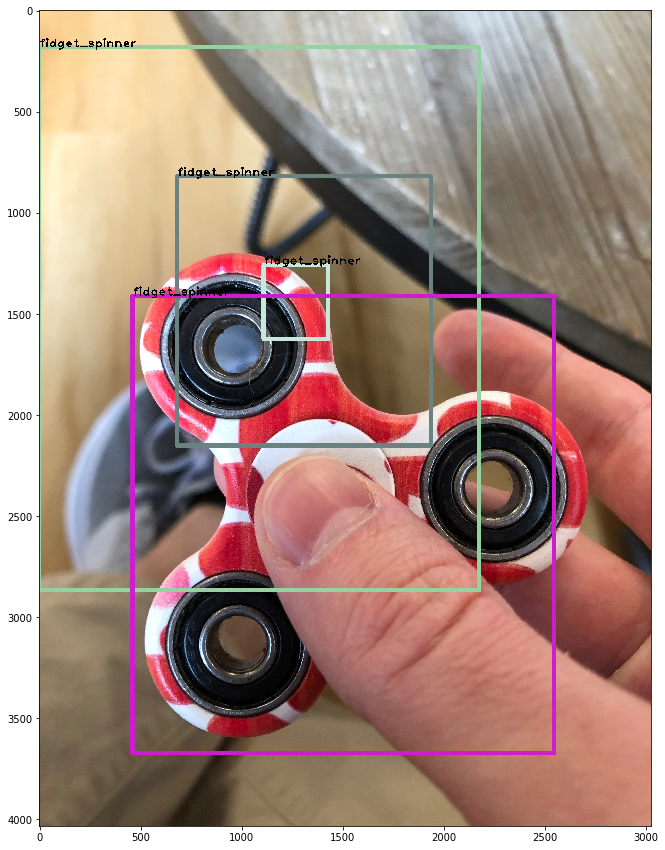

In [61]:
import numpy as np

colors = [tuple(255 * np.random.rand(3)) for i in range(5)]

for color, result in zip(colors, results):
    tl = (result['topleft']['x'], result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    img = cv2.rectangle(img, tl, br, color, 20)
    frame = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_PLAIN, 4, (0, 0, 0), 5)

plt.figure(figsize=(15,15))
plt.imshow(frame)
plt.show()



# tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
# br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
# label = result[0]['label']

# img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
# img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
# plt.imshow(img)
# plt.show()